# Housing Price Prediction

### DATA DESCRIPTION: 

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset is a portion of a larger dataset that consisted of 21 variables and 21613 observations.

### ATTRIBUTES: 

1. id=  It is the unique numeric number assigned to each house being sold. 
2. date=  It is the date on which the house was sold out.
3. price= It is the price of house which we have to predict so this is our target variable and aprat from It are our features. 
4. bedrooms= It determines number of bedrooms in a house. 
5. bathrooms= It determines number of bathrooms in a bedroom of a house. 
6. sqft_living= It is the measurement variable which determines the measurement of house in square foot. 
7. sqft_lot= It is also the measurement variable which determines square foot of the lot. 
8. floors= It determines total floors means levels of house. 
9. waterfront= This feature determines whether a house has a view to waterfront 0 means no 1 means yes. 
10. view= It determines the number of viewings the property received.
11. condition= It determines the overall condition of a house on a scale of 1 to 5. 
12. grade=  It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11 sqft_above= It determines square footage of house apart from basement.
12. sqft_basement= It determines square footage of the basement of the house. 
13. yr_built= It detrmines the date of building of the house. 
14. yr_renovated= It detrmines year of renovation of house. 
15. zipcode= It determines the zipcode of the location of the house. 
16. lat= It determines the latitude of the location of the house. 
17. long= It determines the longitude of the location of the house. 
18. sqft_living15= Living room area in 2015(implies-- some renovations) 
19. sqft_lot15= lotSize area in 2015(implies-- some renovations) 

In [1]:
# importing the necessary libraries

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.stats.api as ssa 
from pylab import rcParams
from mlxtend.feature_selection import SequentialFeatureSelector

In [2]:
rcParams['figure.figsize'] = 25,18


### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset) 

In [3]:
## Kindly change the below cells from markdown to code and execute it 

In [4]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2068000270,20140805T000000,1400000.0,5,3.0,3850,14990,1.0,0,0,...,9,2290,1560,1964,0,98004,47.6425,-122.218,3010,15001
1,7732500700,20141126T000000,832500.0,4,2.5,3450,35100,2.0,0,0,...,10,3450,0,1987,0,98052,47.7302,-122.106,3110,35894
2,7851990240,20140717T000000,771150.0,4,3.5,3950,12320,2.0,0,0,...,10,3950,0,2001,0,98065,47.5414,-121.869,3920,11086
3,3423049269,20140513T000000,225000.0,4,1.5,1950,12559,1.5,0,0,...,6,1950,0,1939,0,98188,47.4364,-122.282,1950,9178
4,7852150200,20140923T000000,389950.0,3,2.5,1700,6396,2.0,0,0,...,7,1700,0,2003,0,98065,47.5333,-121.870,1700,4444


### Data Observations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2001 non-null   int64  
 1   date           2001 non-null   object 
 2   price          2001 non-null   float64
 3   bedrooms       2001 non-null   int64  
 4   bathrooms      2001 non-null   float64
 5   sqft_living    2001 non-null   int64  
 6   sqft_lot       2001 non-null   int64  
 7   floors         2001 non-null   float64
 8   waterfront     2001 non-null   int64  
 9   view           2001 non-null   int64  
 10  condition      2001 non-null   int64  
 11  grade          2001 non-null   int64  
 12  sqft_above     2001 non-null   int64  
 13  sqft_basement  2001 non-null   int64  
 14  yr_built       2001 non-null   int64  
 15  yr_renovated   2001 non-null   int64  
 16  zipcode        2001 non-null   int64  
 17  lat            2001 non-null   float64
 18  long    

In [6]:
print('Size of the dataset :',df.size,'\n')
print('Dimensions of the data :',df.shape)

Size of the dataset : 42021 

Dimensions of the data : (2001, 21)


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.001000e+03,2.001000e+03,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,4.590975e+09,5.296766e+05,3.347326,2.036982,2037.556222,17846.464268,1.423788,0.004998,0.250375,3.449775,7.560220,1728.725637,308.830585,1966.890055,84.676162,98079.052474,47.561350,-122.215569,1956.869065,15241.781109
std,2.888947e+09,3.439288e+05,0.905982,0.753579,896.279579,47218.111461,0.501312,0.070534,0.807949,0.678676,1.154771,790.018690,459.259858,27.893851,402.134842,53.819947,0.137556,0.141858,673.478504,35224.009024
min,1.120040e+07,8.650000e+04,0.000000,0.500000,470.000000,844.000000,1.000000,0.000000,0.000000,1.000000,4.000000,470.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000,399.000000,980.000000
25%,2.114700e+09,3.170000e+05,3.000000,1.500000,1410.000000,5478.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1949.000000,0.000000,98033.000000,47.475800,-122.331000,1460.000000,5325.000000
50%,3.971701e+09,4.500000e+05,3.000000,2.000000,1890.000000,7919.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1969.000000,0.000000,98070.000000,47.573400,-122.233000,1820.000000,7800.000000
75%,7.346600e+09,6.295000e+05,4.000000,2.500000,2470.000000,11085.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1989.000000,0.000000,98118.000000,47.677500,-122.126000,2300.000000,10236.000000
max,9.839301e+09,4.210000e+06,10.000000,8.000000,13540.000000,715690.000000,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2014.000000,2015.000000,98199.000000,47.777500,-121.316000,5500.000000,560617.000000


Inference :

- The dataframe has a total of 2001 rows and 21 columns.
- out of which 5 are of float datatype, 15 are of int64 datatype and 1 object type.
- The five point summary showcases some columns having low standard deviation while some have high standard deviation, indicating the variance in the datapoints for each column.
- Our target variable price has float datatype, and pretty low standard deviation indicating low variance in it's data points.

### Checking the data

In [8]:
# checking for null values

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

inference : The data has no null values

In [9]:
# checking for wrongly identified datatypes
# the column date has been identified as object column however it holds datetime information.

df['date']=pd.to_datetime(df['date'])
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

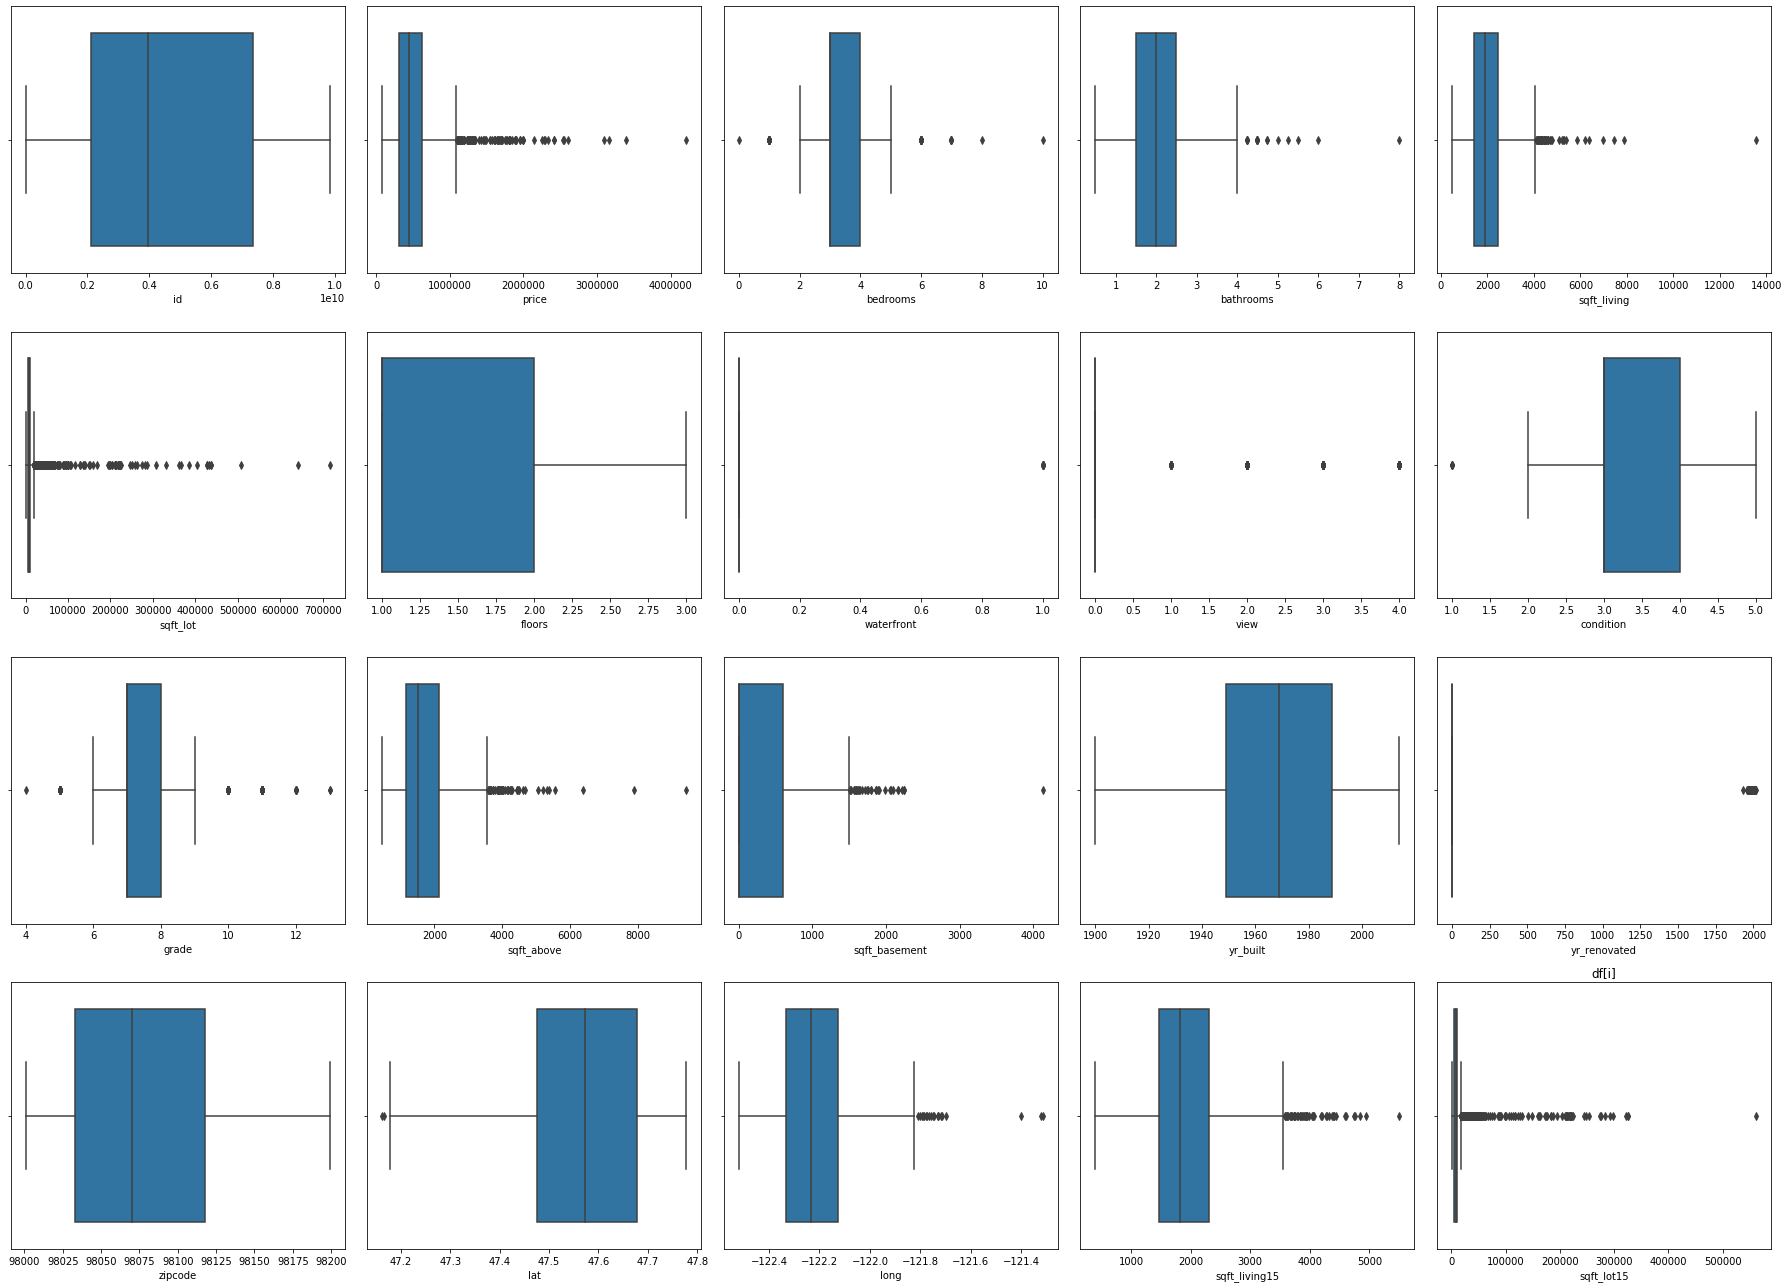

In [14]:
# checking for outliers

fig, ax = plt.subplots(4,5,figsize = (25,18))

for i,subplots in zip(df.columns,ax.flatten()):
    sns.boxplot(df[i],ax = subplots)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

inference :

- columns price, bedroom, sqft_living, sqft_lot, long, sqft_living15, sqft_lot15 display high number of outliers present in the respective columns.
- However these are also column that will differ for each instance as the price, area, location of any property has alot of different unique factors affecting it.

In [11]:
df.kurt()

id                -1.286111
price             17.645239
bedrooms           2.407017
bathrooms          2.433683
sqft_living       15.803376
sqft_lot          71.408654
floors            -0.657882
waterfront       195.596424
view              10.077756
condition          0.300059
grade              1.481042
sqft_above         7.805827
sqft_basement      3.290445
yr_built          -0.653634
yr_renovated      18.640843
zipcode           -0.850330
lat               -0.566585
long               1.905941
sqft_living15      1.628534
sqft_lot15        58.629991
dtype: float64

Inference :

- Some of the columns such as price, sqft_living, sqft_lot, waterfront, view, yr_renovated, sqft_lot15 have a very high kurtosis indicating presence of outliers in majority.

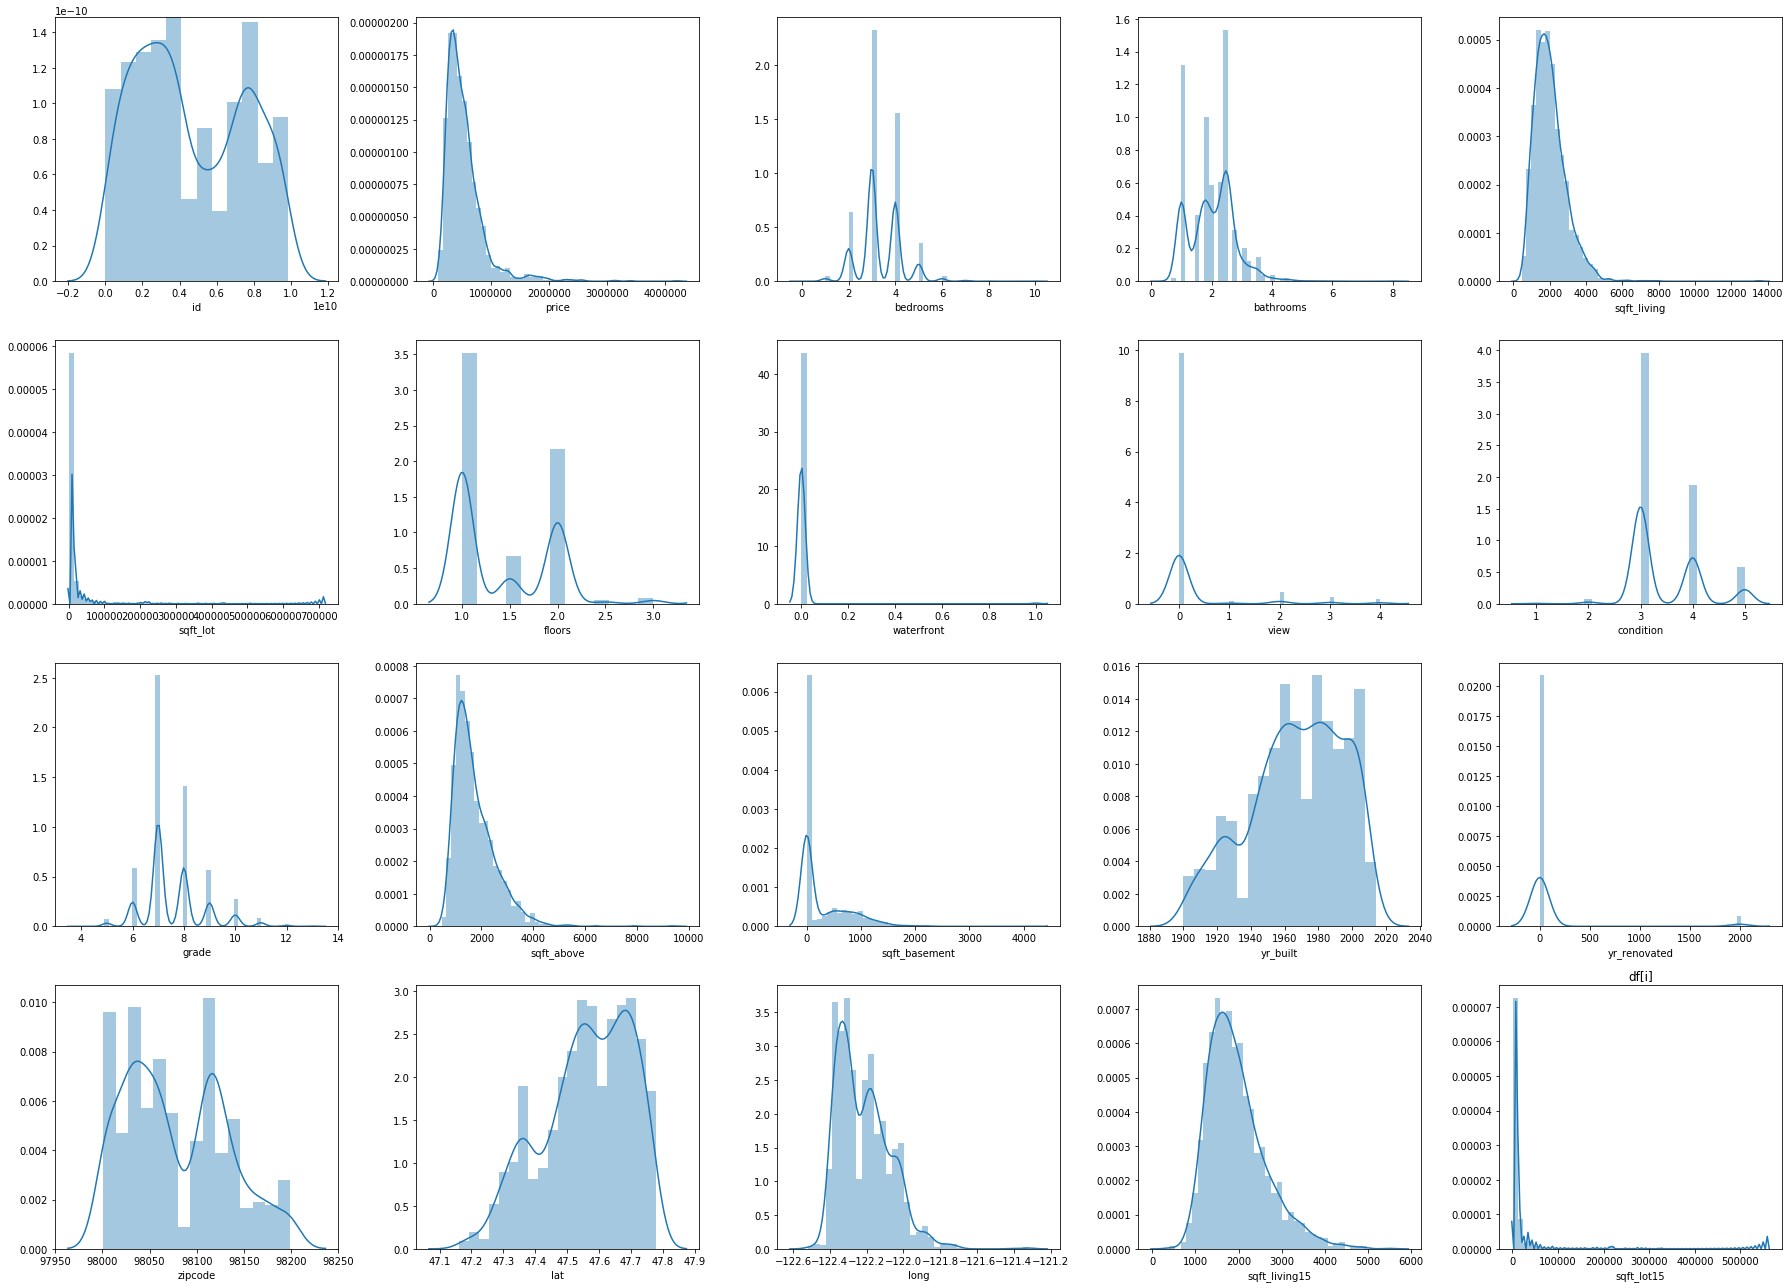

In [15]:
# checking the distribution of data

fig, ax = plt.subplots(4,5,figsize = (25,18))

for i,subplots in zip(df.columns,ax.flatten()):
    sns.distplot(df[i],ax = subplots)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

In [16]:
df.skew()

id                0.216679
price             3.181657
bedrooms          0.596748
bathrooms         0.662714
sqft_living       2.124381
sqft_lot          7.551095
floors            0.675069
waterfront       14.049944
view              3.301426
condition         0.811643
grade             0.924653
sqft_above        1.831939
sqft_basement     1.582349
yr_built         -0.429976
yr_renovated      4.541000
zipcode           0.388079
lat              -0.508505
long              0.999210
sqft_living15     1.105128
sqft_lot15        6.798783
dtype: float64

Inference :

- From the skewness we can see that columns price, sqft_living, sqft_lot, waterfront, view, yr_renovated, sqft_lot15 have a positively right skewed data indicating a concentration of datapoints in the lower values.
- yr_built, lat showcase a negatively left skewed distribution of data.
- all the other columns haave skewness closer to zero, indicating a relatively normal distribution of the data.

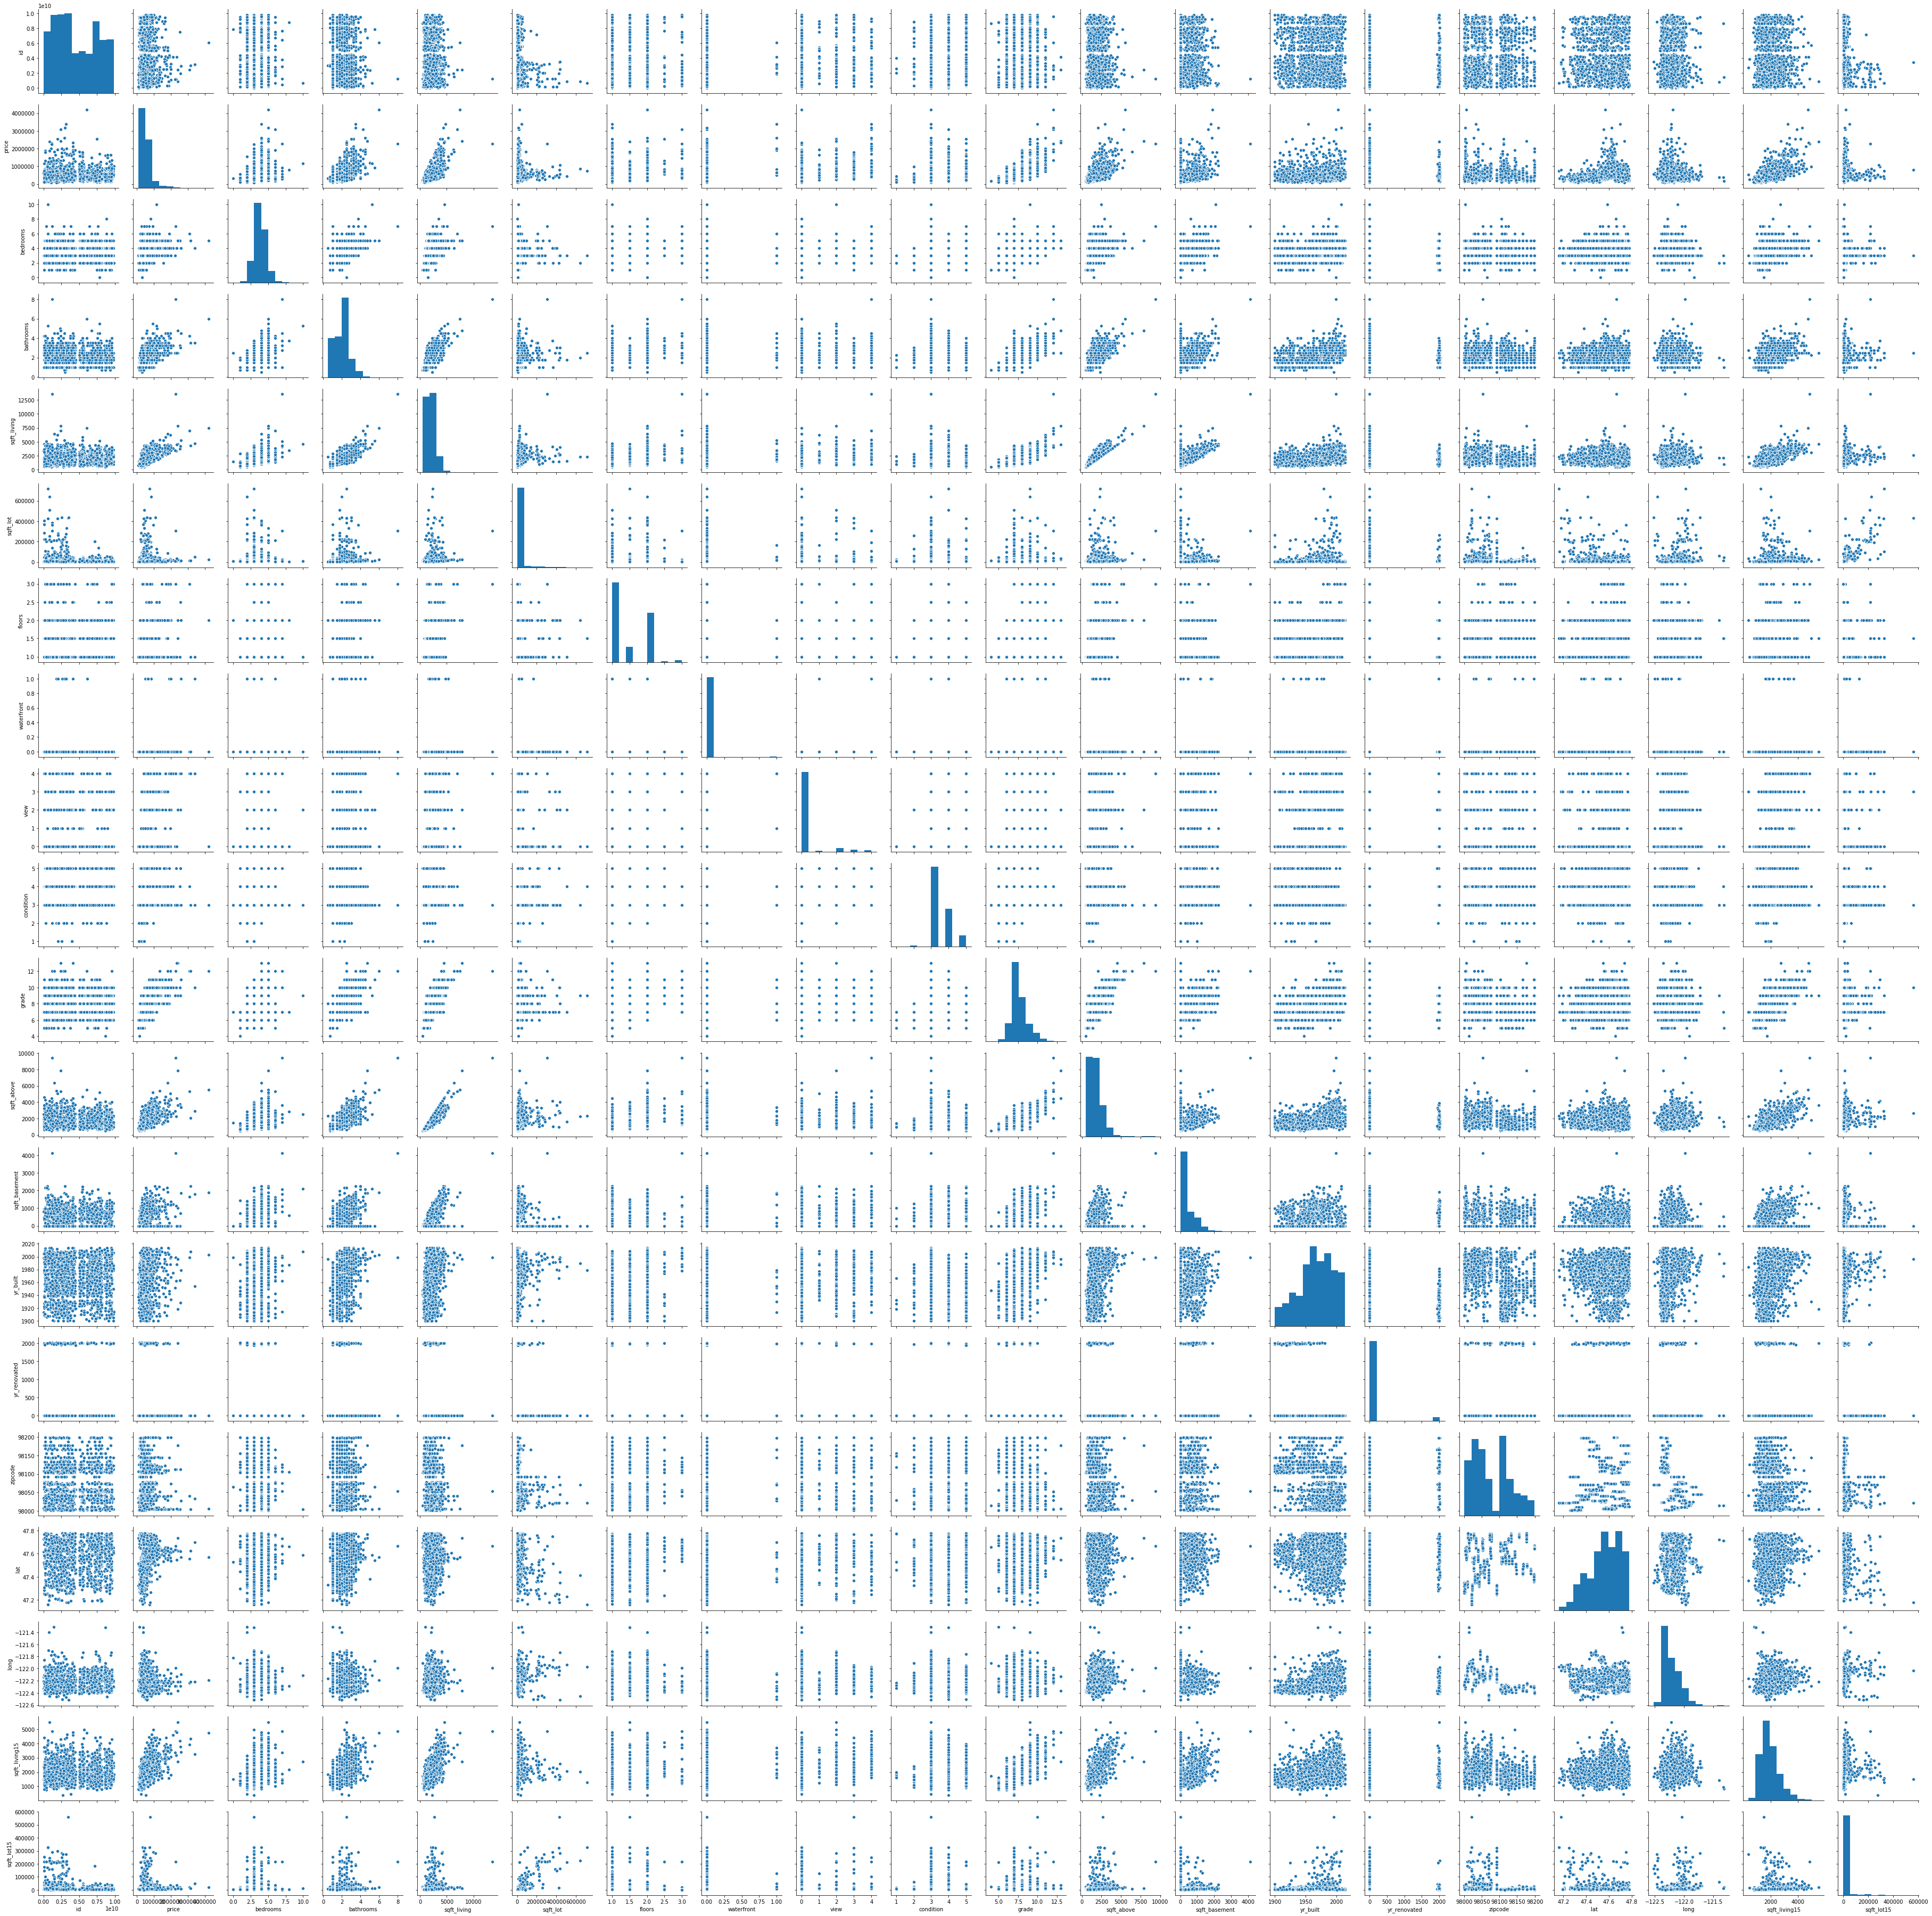

In [17]:
sns.pairplot(df)

In [18]:
# droppping unnecesaary columns 

df.std()

id               2.888947e+09
price            3.439288e+05
bedrooms         9.059824e-01
bathrooms        7.535792e-01
sqft_living      8.962796e+02
sqft_lot         4.721811e+04
floors           5.013121e-01
waterfront       7.053377e-02
view             8.079487e-01
condition        6.786761e-01
grade            1.154771e+00
sqft_above       7.900187e+02
sqft_basement    4.592599e+02
yr_built         2.789385e+01
yr_renovated     4.021348e+02
zipcode          5.381995e+01
lat              1.375561e-01
long             1.418577e-01
sqft_living15    6.734785e+02
sqft_lot15       3.522401e+04
dtype: float64

In [19]:
# column id includes unique specific data which won't be helpful during model building.

df.drop('id',axis = 1, inplace = True) 

In [53]:
# the column includes individual unique data of date and time that isn't necessarily significant with relation to the target variable price. 
df.drop('date',axis = 1,inplace = True)

In [21]:
# columns latitude and longitude also do not show much of a significance as their standard deviation is very low.

df.drop('lat',axis = 1, inplace = True)
df.drop('long',axis = 1,inplace = True)

Preparing the data for Modelv Building :

- We will split the data into two one with outliers and one without outliers.
- We will further compare the models built and choose the optimum.

In [22]:
df_with_outliers = df.copy()
df_without_outliers = df.copy()
print(df_without_outliers.shape)

(2001, 17)


In [23]:
# performing outlier treatment on dataframe without outliers

q1 = df_without_outliers.quantile(0.25)
q3 = df_without_outliers.quantile(0.75)

iqr = q3 - q1

ul = q3 + 4*iqr
ll = q1 + 4*iqr

df_out = df_without_outliers[~((df_without_outliers > ul)|(df_without_outliers < ll)).any(axis = 1)]
df_out.shape

(0, 17)

- As the given values in the data are already low, outlier treatment eliminates them all.
- Hence we will not be performing outlier treatment on the data.

### Visualisation of data

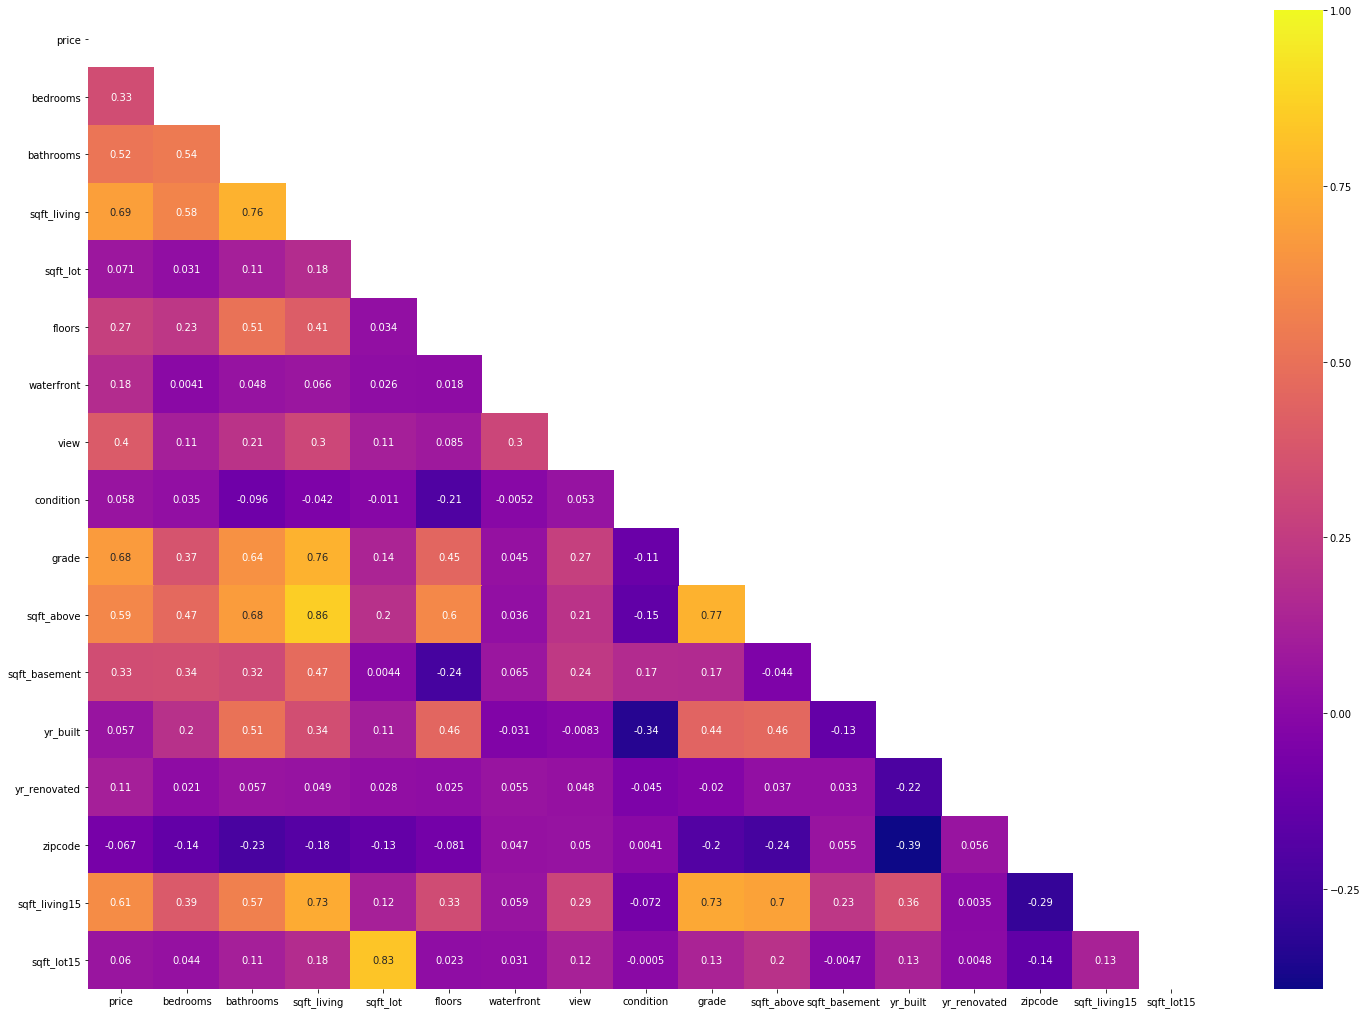

In [24]:
# checking fo rcorrelation among the independent and dependent data variables.

sns.heatmap(df.corr(),annot = True,cmap = 'plasma',mask = np.triu(df.corr()))
plt.show()

Inference :

- Target variable price shares a high correlation with sqft_living15, sqft_above, grade, sqft_living, bathroom. 
- Other than that price shares a moderate to low correlation with all the other columns.
- Price shares a low negative correlation with zipcode.

- variables sqft_lot & sqft_lot15 share a higher correlation among each other.
- grade also seem to have a higher correlation with sqft_living15, sqft_above.
- The variable bathroom seems to share a moderate to high correlation with sqft_living15, yr_built, sqft_above, grade, sqft_living.
- The variable zipcode shares a negative to low correlation with all the independent variables, and also with the dependent variable.

In [25]:
# We will be dropping the zipcode variable as it does not seem to provide much of significance with respect to target variable.

df.drop('zipcode',axis = 1, inplace = True)

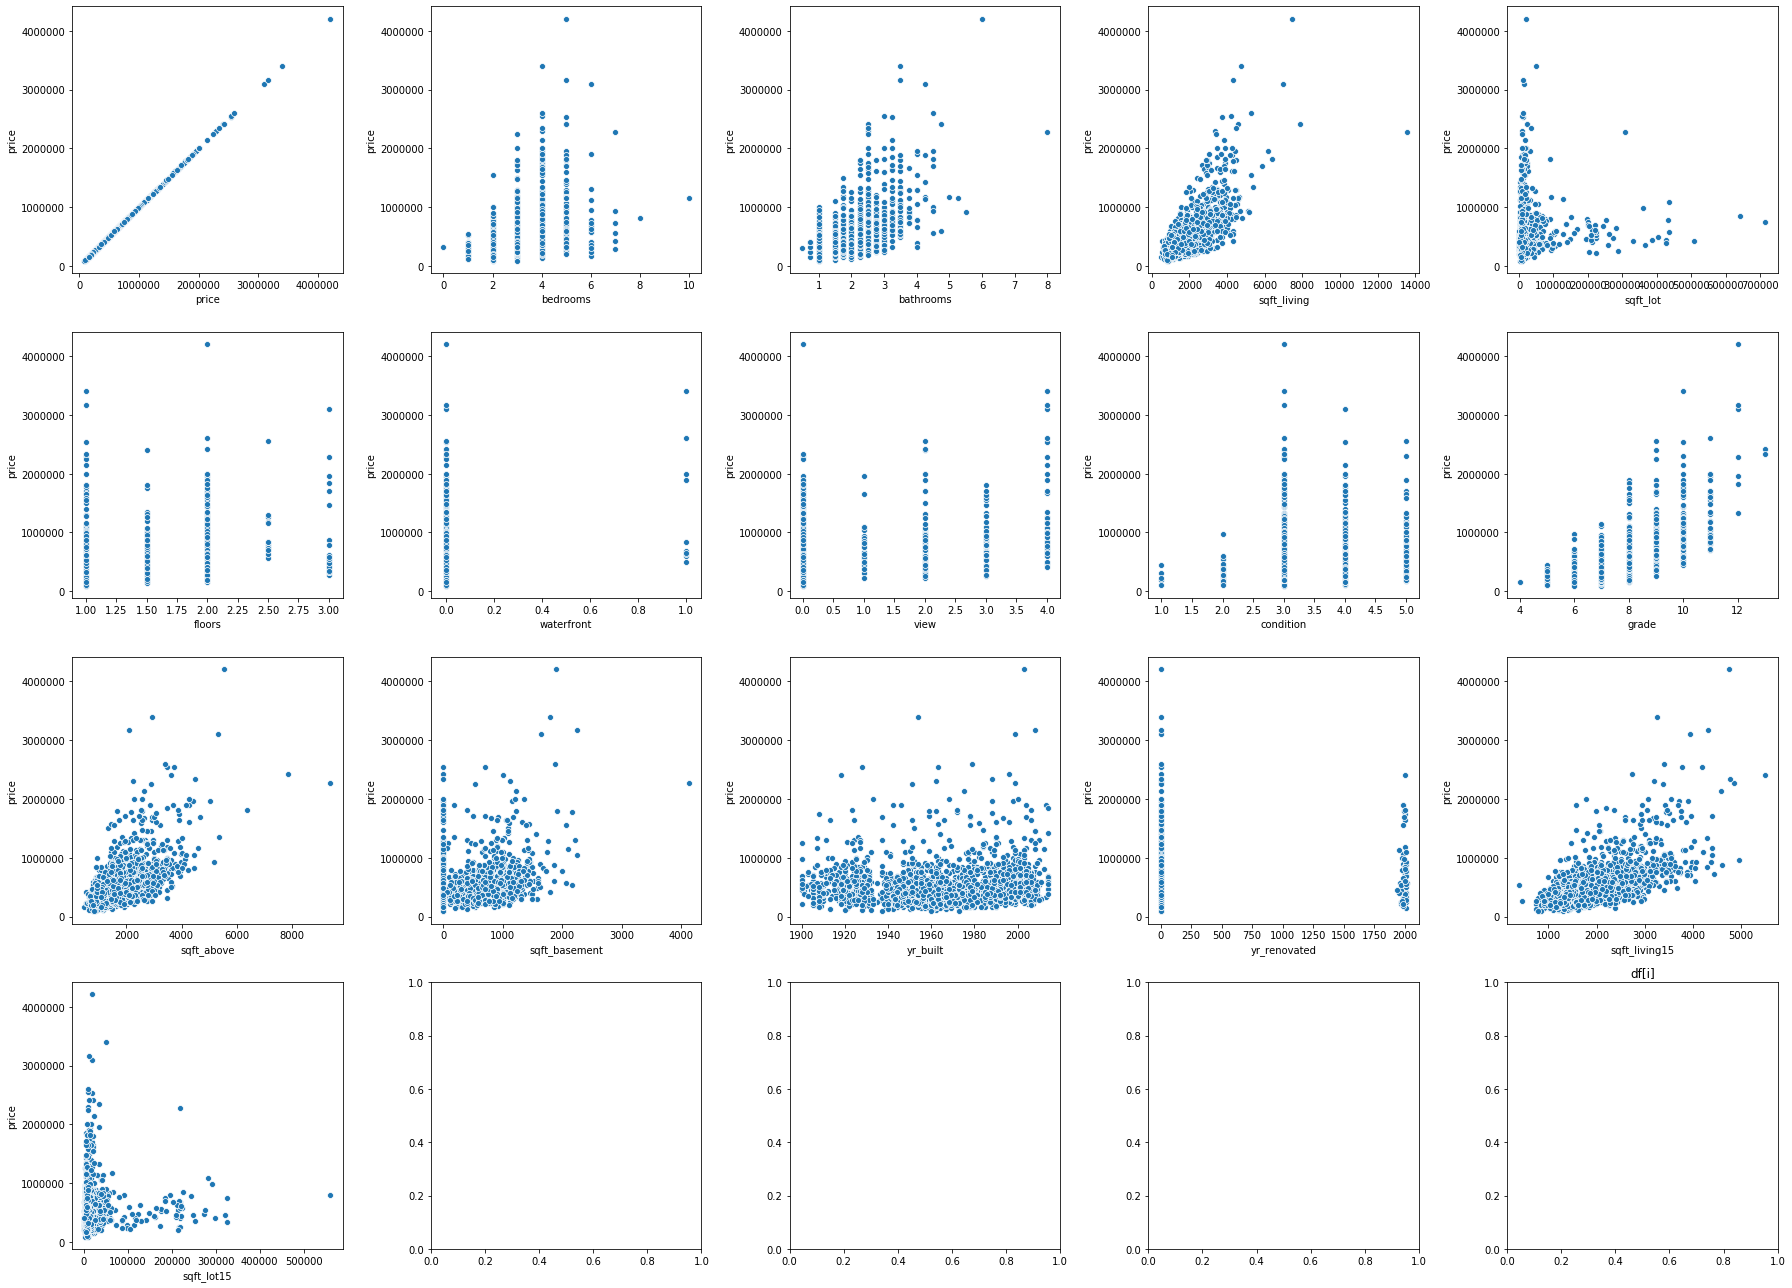

In [26]:
# Relation with target variable

fig, ax = plt.subplots(4,5,figsize = (25,18))

for i,subplots in zip(df.columns,ax.flatten()):
    sns.scatterplot(df[i], df['price'],ax = subplots)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

Inference :

- The datapoints are scattered for columns bathrooms, yr_built, sqft_lot15, sqft_above, sqft_basement, wrt to price displaying the presence of homoscadecity in the data.
- Columns bedrooms, floors, waterfront (binomial categories), views, condition, grade, seem to have categories in numerical form with datapoints distributed smong them.
- Hence the distribution of datapoints wrt to price in these columns is limited to the specific number.

### 	Split dataset into train and test ( Check if tey are good representative of the main dataset with statiscal analysis)

In [27]:
# Let's determine the dependent sdn independent variable for train test split.

X = df.drop('price', axis = 1)
Y = df['price']

In [28]:
# For the sklearn OLS model we will require constant

X_con = sm.add_constant(X)

In [29]:
# Splitting the data into train and test set

x_train, x_test, y_train, y_test = train_test_split(X_con,Y, test_size = 0.3, random_state = 1)

print('Shape of xtrain :',x_train.shape,'\n')
print('Shape of xtest :', x_test.shape,'\n')
print('Shape of ytrain :',y_train.shape,'\n')
print('Shape of ytest :',y_test.shape)

Shape of xtrain : (1400, 16) 

Shape of xtest : (601, 16) 

Shape of ytrain : (1400,) 

Shape of ytest : (601,)


We will perform statistical t test of independence to determine if the train and test data are good representatives of the data.


h0 : they are significant

h1 : they are not significant

alpha : 0.05

In [30]:
stats.ttest_ind(x_train,y_train)

Ttest_indResult(statistic=array([-59.64096246, -59.64069691, -59.64084513, -59.41179084,
       -57.14234789, -59.64091388, -59.64107482, -59.64104742,
       -59.64068535, -59.64022079, -59.4461891 , -59.60665765,
       -59.41844744, -59.6310412 , -59.42079108, -57.67164072]), pvalue=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [31]:
stats.ttest_ind(x_test,y_test)

Ttest_indResult(statistic=array([-35.19323305, -35.19307877, -35.19316493, -35.05733877,
       -33.62246745, -35.19320606, -35.19329872, -35.19328212,
       -35.19307199, -35.19280123, -35.07845077, -35.17219418,
       -35.06417796, -35.18826787, -35.06297931, -33.93653656]), pvalue=array([5.46144222e-187, 5.47606639e-187, 5.46789503e-187, 5.75781955e-186,
       3.64393525e-175, 5.46399759e-187, 5.45522948e-187, 5.45680010e-187,
       5.47670942e-187, 5.50247198e-187, 3.99330607e-186, 7.86455891e-187,
       5.11416045e-186, 5.95225958e-187, 5.22152633e-186, 1.57679244e-177]))

Since the pvalue is greater than alpha we failed to reject null which indicates that the set are good representative of original data.

In [32]:
# performing train test split without the constant for other functions.

xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.3, random_state = 1)

print('Shape of xtrain :',xtrain.shape,'\n')
print('Shape of xtest :', xtest.shape,'\n')
print('Shape of ytrain :',ytrain.shape,'\n')
print('Shape of ytest :',ytest.shape)

Shape of xtrain : (1400, 15) 

Shape of xtest : (601, 15) 

Shape of ytrain : (1400,) 

Shape of ytest : (601,)


### Fitting a base model. Noting key observations 

#### Base Model :

We will be fitting the OLS model from the sklearn library as our base model.

In [33]:
base_model = sm.OLS(y_train,x_train).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     181.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          5.76e-301
Time:                        06:53:53   Log-Likelihood:                -19049.
No. Observations:                1400   AIC:                         3.813e+04
Df Residuals:                    1385   BIC:                         3.821e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.248e+06   5.25e+05     11.910      0.000    5.22e+06    7.28e+06
bedrooms      -2.433e+04   7695.269     -3.162      0.002   -3.94e+04   -9235.983
bathrooms      4.544e+04   1.29e+04      3.534      0.000    2.02e+04    7.07e+04
sqft_living      78.0842      9.258      8.435      0.000      59.924      96.245
sqft_lot          0.1266      0.222      0.571      0.568      -0.308       0.561
floors          3.03e+04    1.5e+04      2.020      0.044     869.726    5.97e+04
waterfront     3.641e+05   6.74e+04      5.402      0.000    2.32e+05    4.96e+05
view           5.692e+04   7543.174      7.546      0.000    4.21e+04    7.17e+04
condition       2.37e+04   8430.611      2.811      0.005    7156.902    4.02e+04
grade          1.231e+05   8295.484     14.842      0.000    1.07e+05    1.39e+05
sqft_above       30.6415      9.582      3.198      0.001      11.845      49.438
sqft_basement    47.4427     10.212      4.646      0.000      27.410      67.476
yr_built      -3631.8105    269.369    -13.483      0.000   -4160.226   -3103.395
yr_renovated     20.4502     13.719      1.491      0.136      -6.462      47.363
sqft_living15    61.9432     12.834      4.826      0.000      36.767      87.119
sqft_lot15       -0.6168      0.302     -2.044      0.041      -1.209      -0.025
==============================================================================
Omnibus:                      631.699   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7259.497
Skew:                           1.787   Prob(JB):                         0.00
Kurtosis:                      13.567   Cond. No.                     2.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.94e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Inference :

- Here the R square value is 0.64 indicating that the model is goodfit.

- The adjusted R square is almost similar to R square indcating that the variables taken into consideration hold significance.

- Fstat value is 181.5 displaying the significance of the group of variables of our model.

- A low standard error and higher coefficient value indicates that the significance of that variable is higher. Columns sqft_living, sqft_above, sqft_basement, yr_renovated, sqft_living15 show a significance.

- Skew ness of the data is 1.7 indicating a slight right skew in the data distribution.

- Kurtosis is 13.56 indicating platykurtic condition. There is presence of outliers in the data.

##### Assumptions :

There are certain assumptions that are taken into consideration to check the fit of a model.

    - normality (between data/ residuals)
    - autocorrelation (between data/ residuals)
    - linearity (between X and Y)
    - multicollinearity (among X variables)
    - heteroscadecity

- Multicollinearity : Looking at the condition number (2.38e+17) we can conclude that there is no multicollinearity present in the data at model level.

- Auto correlation : We can observe that the durbin watson score is 1.99. Hence there is no auto - correlation present in the data.

In [34]:
# for normality 

# h0 : data is normally distributed
# h1 : data is not normally distributed
# alpha : 0.05

test_stat, pval = stats.jarque_bera(base_model.resid)
print(pval)

0.0


- Since pval is lower than alpha we failed to reject null.
- Data is normally distributed

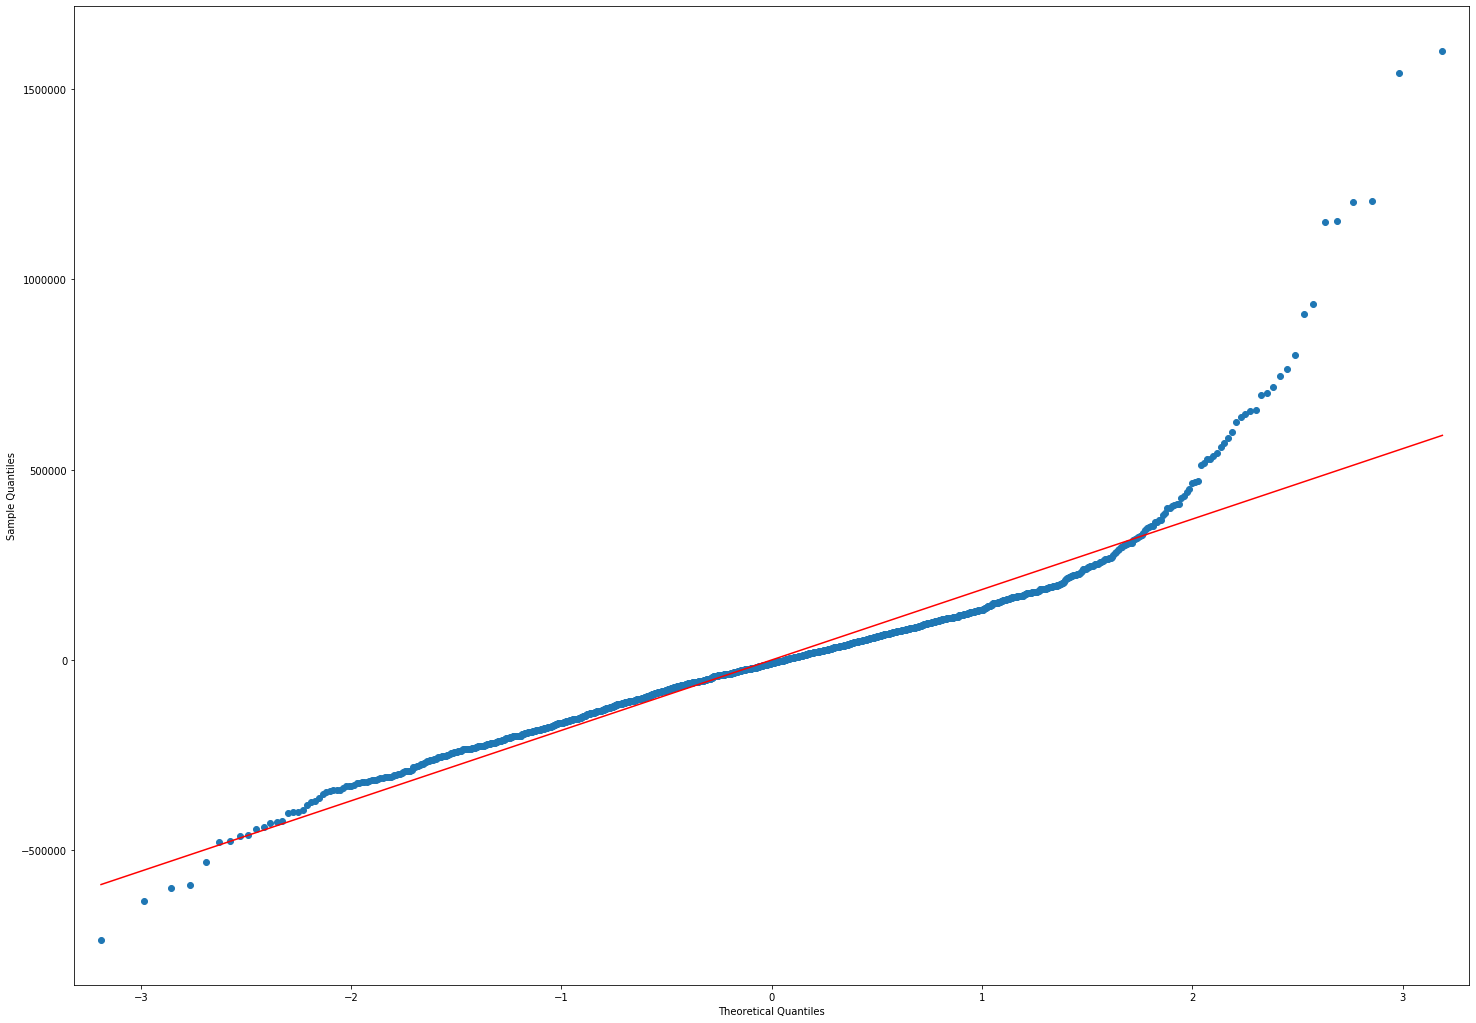

In [35]:
sm.qqplot(base_model.resid,line = 'r')
plt.show()

inference : The values are somewhat closer to the red line indicating a moderately normal distribution of datapoints. Although there are outliers present

In [36]:
# for linearity - linear relation between dependent and independent variable of the model

# h0 : there is linearity present
# h1 : There is no linearity 

sm.stats.linear_rainbow(base_model)

(1.0270287825421118, 0.36299245688283543)

- Here Pval is greater than alpha hence we can say that the independent and dependent variable do share a linear relationship.

In [37]:
# for heteroscadicity - distribution of datapoints

# h0 : there is heteroscadecity present in the variables of the datapoints
# h1 : there is no heteroscadecity present

bpstat,bp_pval,fstat,pval = ssa.het_breuschpagan(base_model.resid,base_model.model.exog)
print(bpstat)
print(bp_pval)
print(fstat)
print(pval)

266.5830357941623
4.708172954464094e-48
23.268293779850907
2.3116492235063247e-54


- Here pval is greater than alpha which means we failed to reject null.
- Heteroscadecity is present in the datapoints of the variables of model.
- The datapoints are ununifurmly scattered/distributed.

### 	Improving the quality of the model


##### Model (with transformation) :

- As seen in our above model there is presence of outliers in the data.
- However due to low datasize performing outlier treatment creates a risk of eliminating datapoints
- From the ols model summary it could also be seen that there is a slight skewness for the data.
- We will perform transformation on the data, scale the data in using boxcox, yeo johnson, log, square roots, cuberoots to fit models and compare thier results.

In [38]:
boxcox_model = sm.OLS(stats.boxcox(y_train)[0],x_train).fit()
yj_model = sm.OLS(stats.yeojohnson(y_train)[0],x_train).fit()
log_model = sm.OLS(np.log(y_train),x_train).fit()
sqrt_model = sm.OLS(np.sqrt(y_train),x_train).fit()
cbrt_model = sm.OLS(np.cbrt(y_train),x_train).fit()

In [39]:
cols = ['Model','Rsquared','Adj_Rsquared']

df_cols = pd.DataFrame(columns = cols)

model_trans = pd.Series({'Model':'Boxcox_model',
                        'Rsquared':boxcox_model.rsquared,
                        'Adj_Rsquared':boxcox_model.rsquared_adj})

transformation_result = df_cols.append(model_trans,ignore_index = True)
transformation_result

,Model,Rsquared,Adj_Rsquared
0,Boxcox_model,0.617424,0.613557


In [40]:
model_trans = pd.Series({'Model':'yj_model',
                        'Rsquared':yj_model.rsquared,
                        'Adj_Rsquared':yj_model.rsquared_adj})

transformation_result = transformation_result.append(model_trans,ignore_index = True)
transformation_result

,Model,Rsquared,Adj_Rsquared
0,Boxcox_model,0.617424,0.613557
1,yj_model,-inf,-inf


In [41]:
model_trans = pd.Series({'Model':'log_model',
                        'Rsquared':log_model.rsquared,
                        'Adj_Rsquared':log_model.rsquared_adj})

transformation_result = transformation_result.append(model_trans,ignore_index = True)

In [42]:
model_trans = pd.Series({'Model':'sqrt_model',
                        'Rsquared':sqrt_model.rsquared,
                        'Adj_Rsquared':sqrt_model.rsquared_adj})

transformation_result = transformation_result.append(model_trans,ignore_index = True)

In [43]:
model_trans = pd.Series({'Model':'cbrt_model',
                        'Rsquared':cbrt_model.rsquared,
                        'Adj_Rsquared':cbrt_model.rsquared_adj})

transformation_result = transformation_result.append(model_trans,ignore_index = True)
transformation_result

,Model,Rsquared,Adj_Rsquared
0,Boxcox_model,0.617424,0.613557
1,yj_model,-inf,-inf
2,log_model,0.644448,0.640854
3,sqrt_model,0.674931,0.671645
4,cbrt_model,0.670516,0.667186


In [44]:
print('Summary of boxcox model :','\n',boxcox_model.summary(),'\n')
print('Summary of yeo johnson model :','\n',yj_model.summary(),'\n')
print('Summary of log transform model :','\n',log_model.summary(),'\n')
print('Summary of squared root model :','\n',yj_model.summary(),'\n')
print('Summary of cuberoot model :','\n',yj_model.summary(),'\n')

Summary of boxcox model : 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          9.47e-277
Time:                        06:53:53   Log-Likelihood:                 3647.6
No. Observations:                1400   AIC:                            -7265.
Df Residuals:                    1385   BIC:                            -7187.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             

inference :

- Looking at the summaries of the models created, models with log transformation and boxcox transformation display a kurtosis of 3.313 and 3.504 respectively.
- Both of these model have their r squared and adj rsquared value similar to each other.
- However Log transform model has an adj rsquare of 0.64 and it's kurtosis is also low.

Hence we can consider the log transformed model as a goodfit model with better accuracy.

##### Model (with feature selection) :

- From our base model it can be observed that there are certain columns that have higher significance with respect to the target variable.
- Feature selection will help us in selecting the best features required for model building.
- we will use the SequentiaFeature Selector function on mlxtend library for model building.

In [45]:
# initialiseing an estimator

lr = LinearRegression()

# Initialising the sfs feature

sfs_forward = SequentialFeatureSelector(estimator = lr,k_features='best',scoring = 'r2',cv = 3)

sfs_forward_best = sfs_forward.fit(xtrain,ytrain)
sfs_forward_best.k_score_

0.6263181498820244

In [46]:
sfs_forward_best.k_feature_names_

('bedrooms',
 'bathrooms',
 'sqft_living',
 'view',
 'grade',
 'yr_built',
 'sqft_living15',
 'sqft_lot15')

In [47]:
cols = ['Model','K_Score']

df_cols = pd.DataFrame(columns = cols)

model_sf = pd.Series({'Model':'model_best_feature',
                        'K_Score':sfs_forward_best.k_score_})

FeatureSelection_result = df_cols.append(model_sf,ignore_index = True)
FeatureSelection_result

,Model,K_Score
0,model_best_feature,0.626318


In [48]:
xtrain.shape

(1400, 15)

In [49]:
# taking a range

sfs_forward = SequentialFeatureSelector(estimator = lr,k_features=(5,10),scoring = 'r2',cv = 3)

sfs_forward_range = sfs_forward.fit(xtrain,ytrain)
sfs_forward_range.k_feature_names_

('bedrooms',
 'bathrooms',
 'sqft_living',
 'view',
 'grade',
 'yr_built',
 'sqft_living15',
 'sqft_lot15')

In [50]:
sfs_forward_range.k_score_

0.6263181498820244

In [51]:
model_sf = pd.Series({'Model':'model(range)',
                        'K_Score':sfs_forward_range.k_score_})

FeatureSelection_result = FeatureSelection_result.append(model_sf,ignore_index = True)

In [52]:
FeatureSelection_result

,Model,K_Score
0,model_best_feature,0.626318
1,model(range),0.626318


Inference :

- After conducting feature selection with k_features as best and range of (5,10) we got similar k scre and similar columns.
- bedrooms, bathrooms, sqft_living, view, grade, yr_built, sqft_living15, sqft_lot15 seem to be the best features to take into considration fo rmodel building.

##### Model (With selected features) :

- Fitting a linear regression model wih selected features to test it's accuracy.

In [56]:
feat = df[['bedrooms','bathrooms','sqft_living','view','grade','yr_built','sqft_living15','sqft_lot15','price']]
feat.head()

,bedrooms,bathrooms,sqft_living,view,grade,yr_built,sqft_living15,sqft_lot15,price
0,5,3.0,3850,0,9,1964,3010,15001,1400000.0
1,4,2.5,3450,0,10,1987,3110,35894,832500.0
2,4,3.5,3950,0,10,2001,3920,11086,771150.0
3,4,1.5,1950,0,6,1939,1950,9178,225000.0
4,3,2.5,1700,0,7,2003,1700,4444,389950.0


In [57]:
# performing train test split on the data

X = feat.drop('price', axis = 1)
Y = feat['price']

# adding constant

X_con = sm.add_constant(X)

# splitting the data

x_train, x_test, y_train, y_test = train_test_split(X_con,Y, test_size = 0.3, random_state = 1)

print('Shape of xtrain :',x_train.shape,'\n')
print('Shape of xtest :', x_test.shape,'\n')
print('Shape of ytrain :',y_train.shape,'\n')
print('Shape of ytest :',y_test.shape)

Shape of xtrain : (1400, 9) 

Shape of xtest : (601, 9) 

Shape of ytrain : (1400,) 

Shape of ytest : (601,)


In [58]:
lr = LinearRegression()

lr_model = lr.fit(x_train,y_train)

trainpred = lr_model.predict(x_train)
testpred = lr_model.predict(x_test)

rmse_train = mean_squared_error(y_train,trainpred)
rmse_test = mean_squared_error(y_test,testpred)

print('RMSE of train set :',rmse_train,'\n')
print('RMSE of test set :',rmse_test)

RMSE of train set : 39703550187.6975 

RMSE of test set : 49128992620.158394


- The rmse score of test data is more than training data indicationg an overfitting condition of the model.

##### Model (with regularisation) :

- As seen above that taking into consideration only the selected best features gives us a model with overfitting condition.
- Regularisation is a technique where we can penalise the variables, so that the importance ofvariables is equally(as per necessity) distributed.

We can perform regularisation in three ways ridge, lasso, elasticnet

We can also conduct a grid search cv to get the best parameters for the regularisation techniques.

In [62]:
# initialising the regularisation technique

ridge = Ridge()

# creating a list parameter

params = {'alpha':[0.1,0.3,0.5,1,5,10,12]}

# Performing grid search cv

r_grid = GridSearchCV(estimator=ridge,param_grid=params,scoring = 'neg_mean_squared_error',cv = 5)

r_grid.fit(xtrain,ytrain)

r_grid.best_params_

{'alpha': 0.1}

In [66]:
ridge = Ridge(alpha = 0.1)

ridge_model = ridge.fit(xtrain,ytrain)

trainpred = ridge_model.predict(xtrain)
testpred = ridge_model.predict(xtest)

rmse_train = mean_squared_error(ytrain,trainpred)
rmse_test = mean_squared_error(ytest,testpred)

print('RMSE of train set :',rmse_train,'\n')
print('RMSE of test set :',rmse_test)

RMSE of train set : 38540877327.482765 

RMSE of test set : 49198922296.276764


- The test score is still higher. he model is in overfit condition.

In [65]:
# for Lasso
# initialising the regularisation technique

lasso = Lasso()

# creating a list parameter

params = {'alpha':[0.1,0.3,0.5,1,5,10,12]}

# Performing grid search cv

l_grid = GridSearchCV(estimator=lasso,param_grid=params,scoring = 'neg_mean_squared_error',cv = 5)

l_grid.fit(xtrain,ytrain)

l_grid.best_params_

{'alpha': 0.1}

In [67]:
lasso = Lasso(alpha = 0.1)

lasso_model = lasso.fit(xtrain,ytrain)

trainpred = lasso_model.predict(xtrain)
testpred = lasso_model.predict(xtest)

rmse_train = mean_squared_error(ytrain,trainpred)
rmse_test = mean_squared_error(ytest,testpred)

print('RMSE of train set :',rmse_train,'\n')
print('RMSE of test set :',rmse_test)

RMSE of train set : 38540770311.01771 

RMSE of test set : 49195810605.708694


- The model is in overfit condition

In [68]:
# For elasticnet
# initialising the regularisation technique

en = ElasticNet()

# creating a list parameter

params = {'alpha':[0.2,0.3,0.5,1,5,10,12],
         'l1_ratio':[0.2,0.3,0.5,1,5,10,12]}

# Performing grid search cv

en_grid = GridSearchCV(estimator=en,param_grid=params,scoring = 'neg_mean_squared_error',cv = 5)

en_grid.fit(xtrain,ytrain)

en_grid.best_params_

{'alpha': 0.2, 'l1_ratio': 1}

In [69]:
en = ElasticNet(alpha = 0.2,l1_ratio=1)

en_model = en.fit(xtrain,ytrain)

trainpred = en_model.predict(xtrain)
testpred = en_model.predict(xtest)

rmse_train = mean_squared_error(ytrain,trainpred)
rmse_test = mean_squared_error(ytest,testpred)

print('RMSE of train set :',rmse_train,'\n')
print('RMSE of test set :',rmse_test)

RMSE of train set : 38540770316.084564 

RMSE of test set : 49195798059.22281


- It is an overfit model.

### 	Summary

##### Best Model Selection :

- The log transformed model will be selected as the best goodfit model.

In [70]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.14e-298
Time:                        07:24:47   Log-Likelihood:                -324.78
No. Observations:                1400   AIC:                             679.6
Df Residuals:                    1385   BIC:                             758.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.4064      0.815     27.479      0.000      20.807      24.006
bedrooms         -0.0287      0.012     -2.400      0.017      -0.052      -0.005
bathrooms         0.1109      0.020      5.549      0.000       0.072       0.150
sqft_living    7.827e-05   1.44e-05      5.439      0.000       5e-05       0.000
sqft_lot        5.32e-07   3.45e-07      1.544      0.123   -1.44e-07    1.21e-06
floors            0.1080      0.023      4.632      0.000       0.062       0.154
waterfront        0.2176      0.105      2.077      0.038       0.012       0.423
view              0.0485      0.012      4.135      0.000       0.025       0.071
condition         0.0547      0.013      4.178      0.000       0.029       0.080
grade             0.2065      0.013     16.015      0.000       0.181       0.232
sqft_above      5.04e-06   1.49e-05      0.338      0.735   -2.42e-05    3.43e-05
sqft_basement  7.323e-05   1.59e-05      4.613      0.000    4.21e-05       0.000
yr_built         -0.0060      0.000    -14.427      0.000      -0.007      -0.005
yr_renovated   3.543e-05   2.13e-05      1.662      0.097    -6.4e-06    7.73e-05
sqft_living15     0.0001   1.99e-05      7.058      0.000       0.000       0.000
sqft_lot15    -7.862e-07   4.69e-07     -1.676      0.094   -1.71e-06    1.34e-07
==============================================================================
Omnibus:                       11.915   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.867
Skew:                          -0.175   Prob(JB):                      0.00161
Kurtosis:                       3.313   Cond. No.                     2.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.94e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###### 1. Summary :

- The rsquare and adjusted rsquare for the model indicates a goodfit model.

- Fstat indicates a significance of 179.3 for the group of variables, which can be considered as a good score.

- comparing the coefficient and standard error of the variables, bathrooms, floors, waterfront,view, condition, grade, yr_built, sqft_living15 show a significance.

- More number of variables are being taken into consideration/ contributing to the pattern understanding for prediction of target variable (price).

- Kurtosis displays lesser presence of outliers which means the data might have normal distribution.

- There is no multicollinearity present (condition no. : 2.38e+17), whcich means all the independent variables are true to their independence and do not share any relation among each other.


##### 2. Business Interpretation :

- Price prediction of any property is dependent on certain internal as well as external factors.

- Internal factors, such as bathrooms, floors, sqft_living15 can be taken into consideration when determining the price of the property.

- Factors related to the property such as waterfront, view also play a major role when it comes to price detrmination.

- The business should also take into consideration the condition and grading of the property to fairly predict the price.

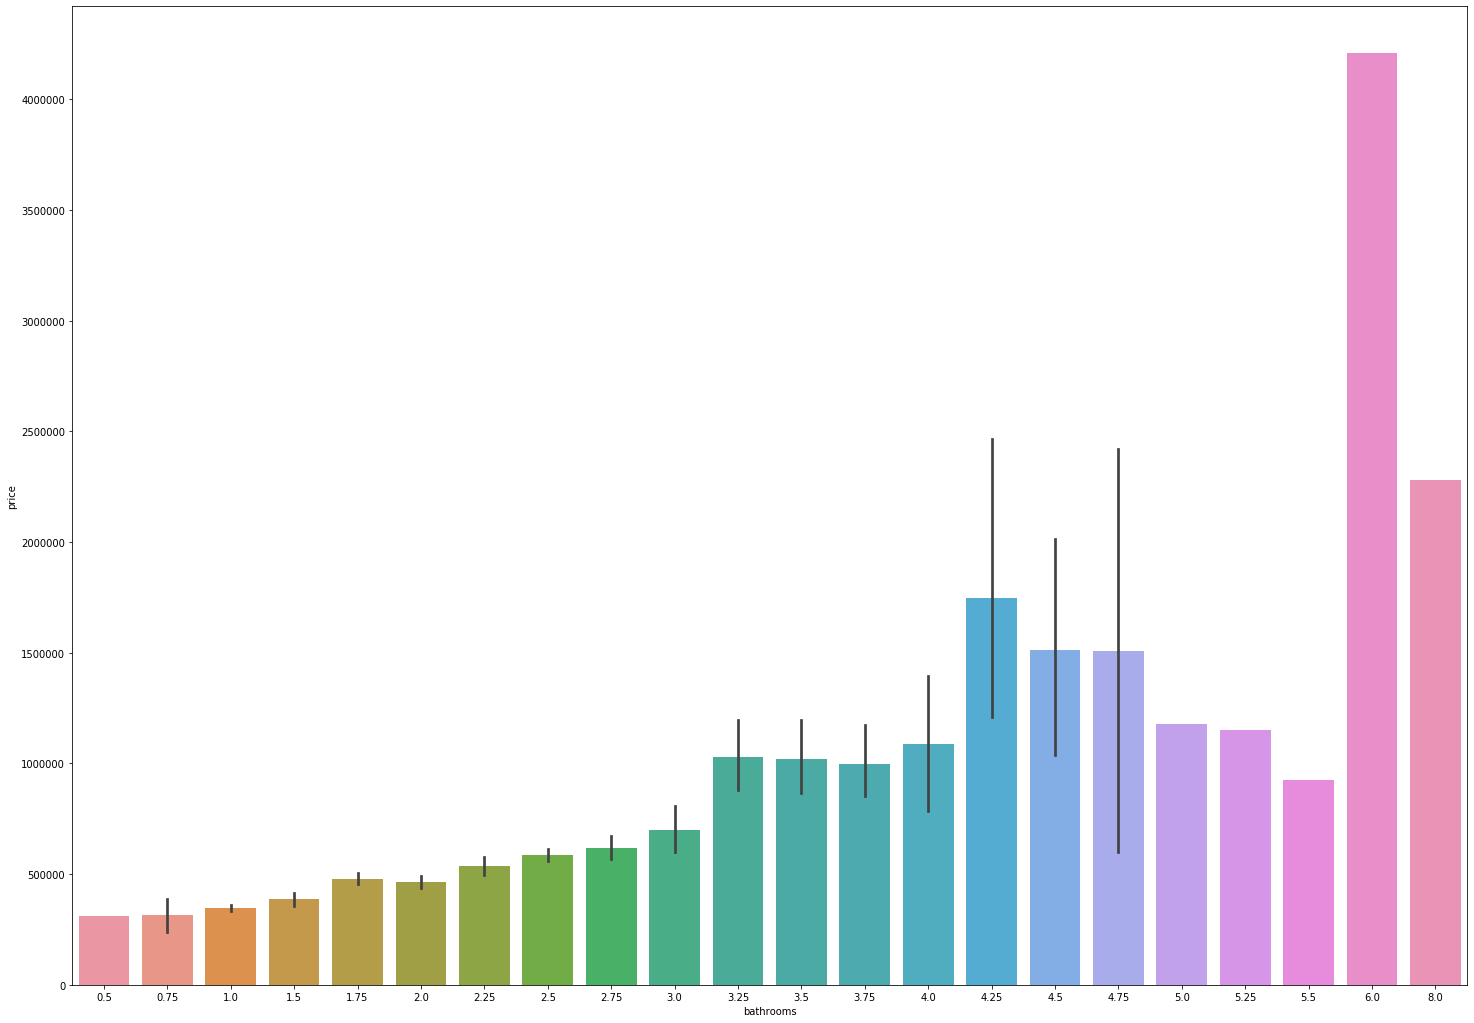

In [91]:
sns.barplot(df['bathrooms'],df['price'])

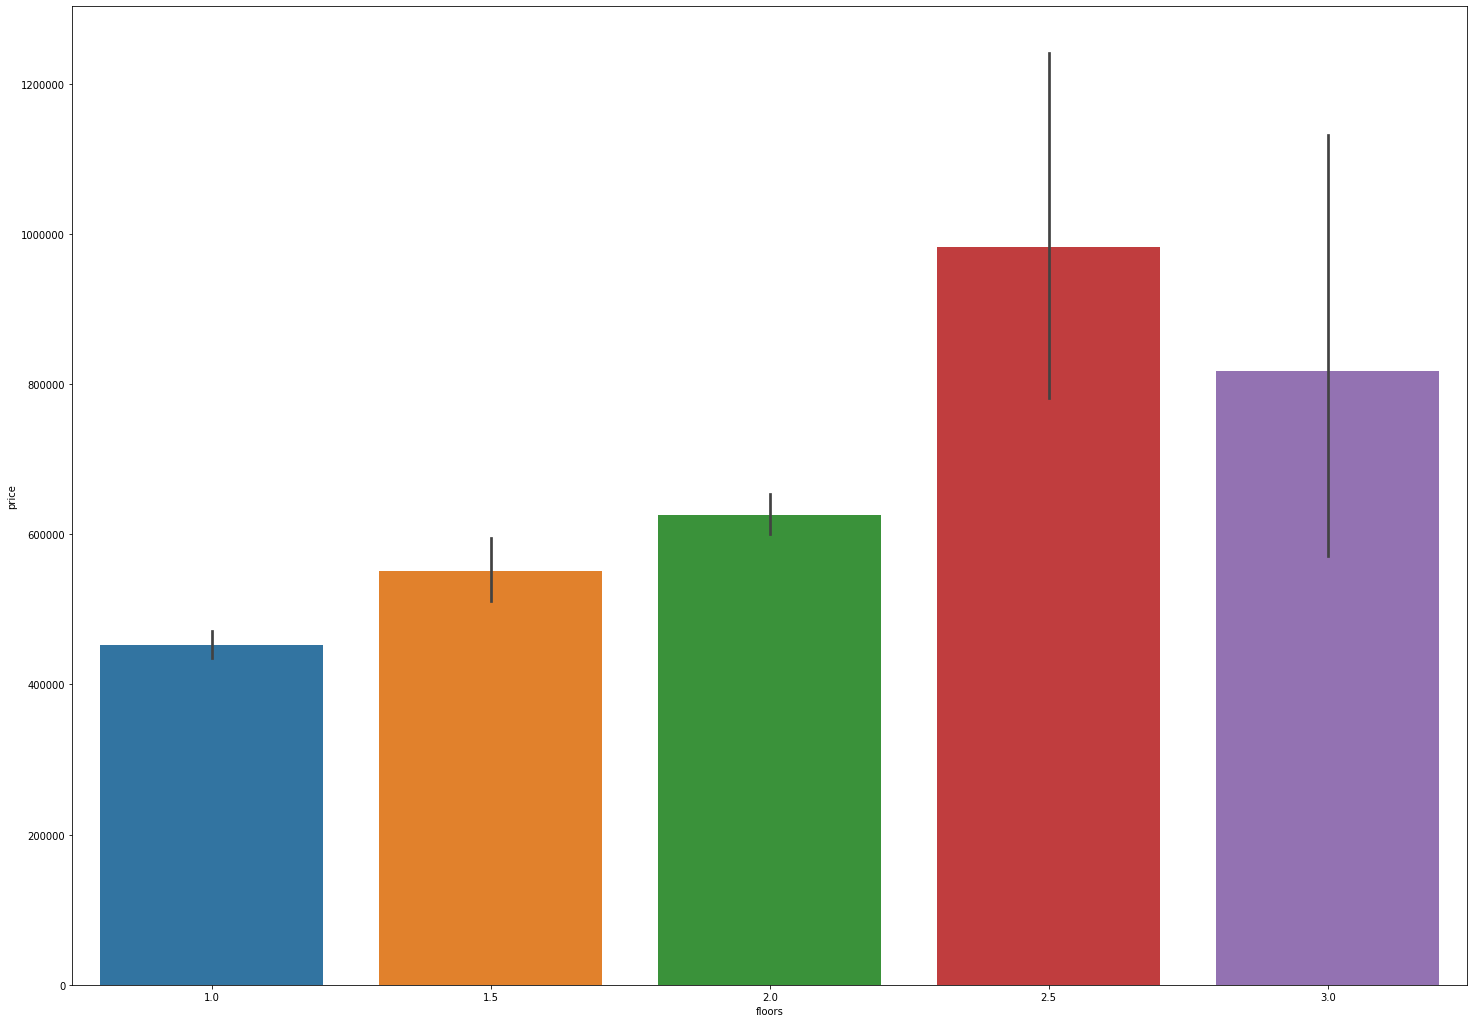

In [92]:
sns.barplot(df['floors'],df['price'])

- higher number of bathrooms and floors display higher prices

##### 3.  changes effect :
- Performing transformation to normalise the data has helped in improving the performance of the model by the slightest. 
- It also helped in making sure more variables are being considered for model building, as their are certain variables whose significance increased.

##### 4. risks/drawbacks :

- Since the datapoints were low in number the model might have learned only selected few patterns for price prediction.
- Due to presence of outliers within the data there is a chance of wrongly read pattern that might correctly identify the price which might be false in a business sense.